# Naivve Bayes Classifiers

Naive Bayes classifiers are typically faster trainers than linear classification models, but perform slightly worse with
generalization.  

- Bayes models learn parameters by looking at each feature individually and collect statistics from each feature
- there are three bayes classifiers in scikit-learn they are:
    1. GaussianNB (applied to continous data)
    2. BernoulliNB ( applied to binary data ) used in text classification
        - counts how often every feature in each class is not zero
    3. MultinomialNB ( applied to count data ) used in text classification
    


In [1]:
# standard modules we will always use
import pandas as pd
import numpy as np
import scipy as sp
import mglearn
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# example of bernoulli count
X = np.array([[1,0,1,0],
            [0,1,1,1],
            [1,0,0,1],
            [0,1,1,0]])
Y = np.array([0,1,0,1])

# Class 0 is 1 and 3 data in Y
# np.unique returns an array of unique elements in the array of interest
counts = {} # dictionary
for label in np.unique(Y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[Y == label].sum(axis = 0)
print("Feature counts: \n{}".format(counts))

Feature counts: 
{0: array([2, 0, 1, 1]), 1: array([0, 2, 2, 1])}


Multionomial takes into account the average value of each feature in a class
Guassian takes the average and standard deviation 

Prediction is made by comparing a data point to the statistics of each class and going with the best matching class

# Strength, Weakness and parameters

- multi/binomialNB have one alpha parameter to determine model complexity.  (remember to state difference between 
parameter and feature)
- alpha is not critical to performance but does improve accuracy somewhat
- the larger the alpha the smoother and less complex the model
- alpha adds alpha number of virtual data points that have positive values for all of the features.
- used when large datasets may even take too long for linear models

# Decision Trees  
 - in scikit learn we have DecisionTreeRegression and DecisonTreeClassifier 
 - scikit learn only implements pre-prunning for overfitting problem for decision Trees

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("default.csv")
display(data)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_mo
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
X = data[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3',
 'PAY_AMT4','PAY_AMT5','PAY_AMT6']]
Y = data['default_next_mo']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 42) #random state is to validate the same sequence everytime you run


In [9]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [11]:
tree = dtree(random_state = 0)
tree.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test accuracy: {:.3f}'.format(tree.score(X_test, y_test)))

# this model is clearly overfitted and needs to be pruned

Training accuracy: 1.000
Test accuracy: 0.732


In [12]:
tree1 = dtree(max_depth = 4, random_state = 0)  # max depth is used for pruning
tree1.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(tree1.score(X_train, y_train)))
print('Test accuracy: {:.3f}'.format(tree1.score(X_test, y_test)))

# much better results where the accuracy is almost identicical for training and test, but this suggests maybe underfitting


Training accuracy: 0.824
Test accuracy: 0.821


In [18]:
tree2 = dtree(max_depth = 8, random_state = 0)  # max depth is used for pruning
tree2.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(tree2.score(X_train, y_train)))
print('Test accuracy: {:.3f}'.format(tree2.score(X_test, y_test)))

# after increasing the depth the model improved on training but decreased on test
# this suggests that our depth of 4 was likely our optimal choice

Training accuracy: 0.835
Test accuracy: 0.814


# analyzing decision trees

visualize tree with export_graphivis  from tree module
- writes to a .dot file (used for storing graphs)
- we color nodes to reflect frequency in each node


In [26]:
from sklearn.tree import export_graphviz
export_graphviz(tree1, out_file="tree.dot", class_names = ["good", "bad"],
               feature_names = list(X), impurity = False, filled = True)

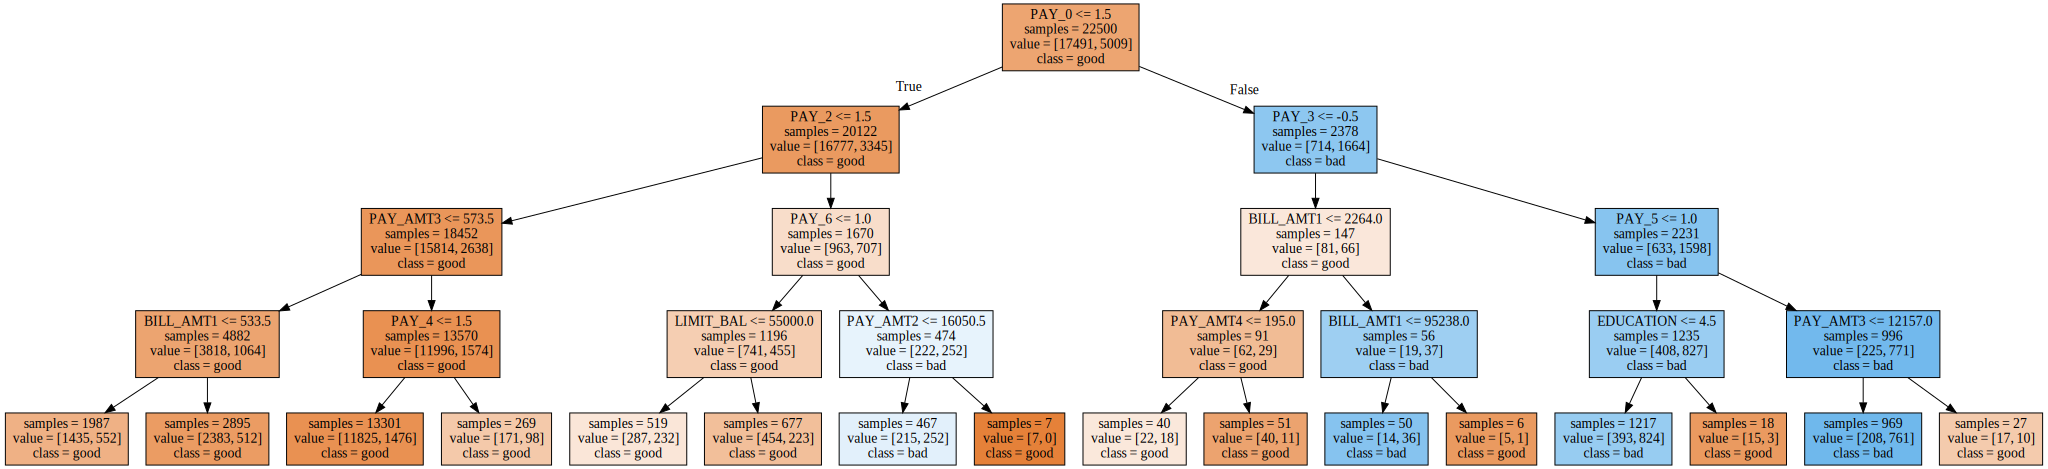

In [27]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

use ubuntu to install modules not in path or 

import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

# Analysis continued  

- pay attention to the samples per class in nodes, sometimes we can find the most important features by looking at the bulk of data and ignoring the more granular variables

- It is also a good idea to analyze feature importance in a tree which tells you on a scale of  0 to 1 its importance with the sum(features 0 to 1) = 1  


In [28]:
print("Feature importance: \n{}".format(tree.feature_importances_))

Feature importance: 
[0.05926321 0.01202537 0.0216659  0.01295355 0.07035404 0.16473137
 0.03632537 0.0109221  0.01037006 0.00874294 0.01148423 0.06283541
 0.04862918 0.04631259 0.03982546 0.04788337 0.04908987 0.04615644
 0.04949565 0.05443271 0.04498442 0.0419983  0.04951847]


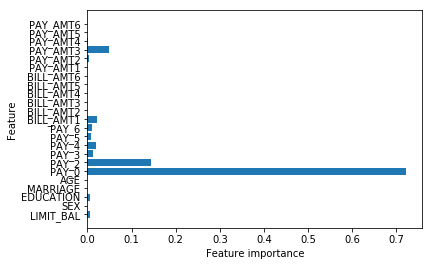

In [30]:
# we can also visualize
def plot_feature_importance(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align= 'center')
    plt.yticks(np.arange(n_features), list(X))
    plt.xlabel("Feature importance")
    plt.ylabel('Feature')
    
plot_feature_importance(tree1)

Decision Trees are good for explaining to  nonexperts, but are typically good for prediction
They tend to overfit despite pre-pruning and are poor at generalization.  
This is the reason we use Ensembles of decision trees and most frequently Random Forests

# Ensembles of Decision Trees
- methods that combine multiple machine learning models for better models

1.Random Forests
2.Gradient Boosted Decision Trees

# Random Forests

- Random Forests improve overfitting in decision trees by averaging over many trees that are different.
Random forests are random in two ways:
    1. bootstrapping on the data
    2. selecting the features to use in each split test
    

    1. Decide on the number of trees to build
    2. choose the number of features max_features.  (If may features = n_features, there is no randomness in feature, but the lower the features, the more randomness in features)
    3. for regression average results for prediction, for classification, we use soft voting. each tree predicts with a certain probability, then the probs are averaged.   

In [31]:
from sklearn.ensemble import RandomForestClassifier as RFC


In [39]:
X2 = data[['EDUCATION','PAY_0']]
Y2 = data.iloc[:, 23].values
X2 = X2.values
X2

array([[ 2,  2],
       [ 2, -1],
       [ 2,  0],
       ...,
       [ 2,  4],
       [ 3,  1],
       [ 2,  0]])

In [44]:
X0 = X2[:,0]
X1 = X2[:,1]

In [46]:
# we have constructed 5 trees with n_estimator

forest = RFC(n_estimators = 5, random_state = 42)
forest.fit(X2 , Y2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

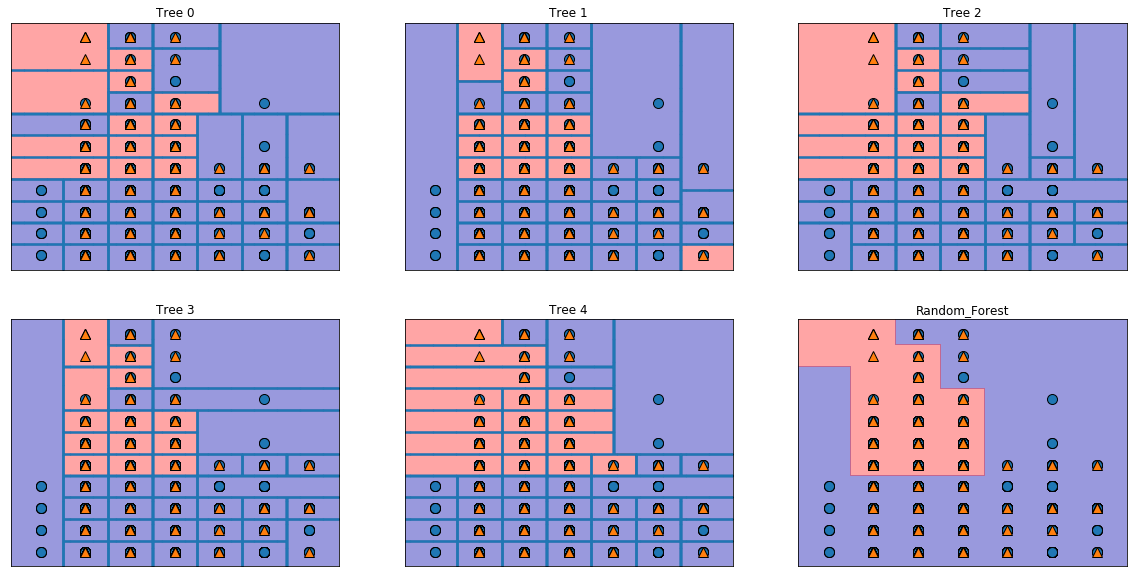

In [45]:
# The last graph is the random forest.  

fig, axes = plt.subplots(2,3, figsize= (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X2, Y2, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(forest, X2, fill = True, ax = axes[-1,-1],
                               alpha = .4)
axes[-1,-1].set_title("Random_Forest")
mglearn.discrete_scatter(X0,X1, Y2)

In [47]:
forest = RFC(n_estimators = 100, random_state = 42)
forest.fit(X_train, y_train)
print("Training Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("Testing Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Training Accuracy: 1.000
Testing Accuracy: 0.816


# The model is clearly overfitted

- We can adjust the number of features,
- We can adjust the sample size
- We can adjust the max depth 

In [53]:
# Max depth of about 10 is the best pre-prunned model so far
forest = RFC(n_estimators = 100, random_state = 42, max_depth = 10)
forest.fit(X_train, y_train)
print("Training Accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("Testing Accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Training Accuracy: 0.858
Testing Accuracy: 0.823


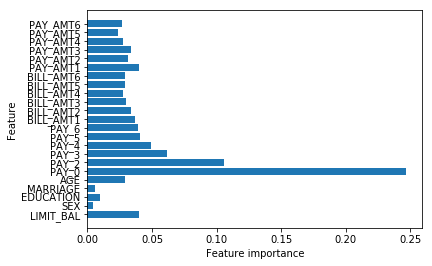

In [54]:
plot_feature_importance(forest)


# Gradient Boost Regression Tree

- Works by building trees in a serial manner 
    - each tree tries to correct mistakes from the previous tree.
- no randomization so strong pre-prunning is used.   
- each tree only provides good predictions on part of the data.   
- gradient boost also have learning_rate as an important parameter (controls how strongly a tree corrects mistakes)
- higher learning rate means stronger correction and more complex models
- more trees n_estimators also means a more complex model.  

In [56]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [57]:
gbct = GBC(random_state = 42)
gbct = gbct.fit(X_train, y_train)
print("training accuracy: {: .3f}".format(gbct.score(X_train,y_train)))
print("testing accuracy: {: .3f}".format(gbct.score(X_test,y_test)))

training accuracy:  0.827
testing accuracy:  0.821


In [58]:
gbct = GBC(random_state = 42, learning_rate = .1)
gbct = gbct.fit(X_train, y_train)
print("training accuracy: {: .3f}".format(gbct.score(X_train,y_train)))
print("testing accuracy: {: .3f}".format(gbct.score(X_test,y_test)))

training accuracy:  0.827
testing accuracy:  0.821


In [59]:
gbct = GBC(random_state = 42, n_estimators = 15)
gbct = gbct.fit(X_train, y_train)
print("training accuracy: {: .3f}".format(gbct.score(X_train,y_train)))
print("testing accuracy: {: .3f}".format(gbct.score(X_test,y_test)))

training accuracy:  0.822
testing accuracy:  0.820


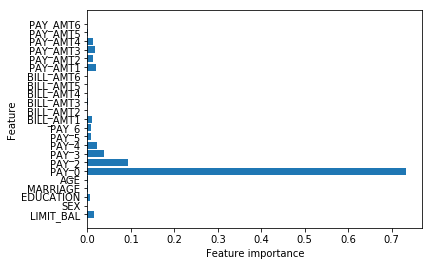

In [61]:
plot_feature_importance(gbct)
# many of the variables have dropped out, which is not the same case for the random forest

# Strenghs, Weakness and Parameters of Gradiant Boost Regression Tree

- use xgboost package if you have a large-scale problem over scikit-learn
- biggest drawback for models is careful parameter tuning
- does not work well with high demensional data.   

Main Parameters:
    1. learning_rate
    2. n_estimators (fit based on time and memory budget)
        - large n_estimators can lead to overfitting

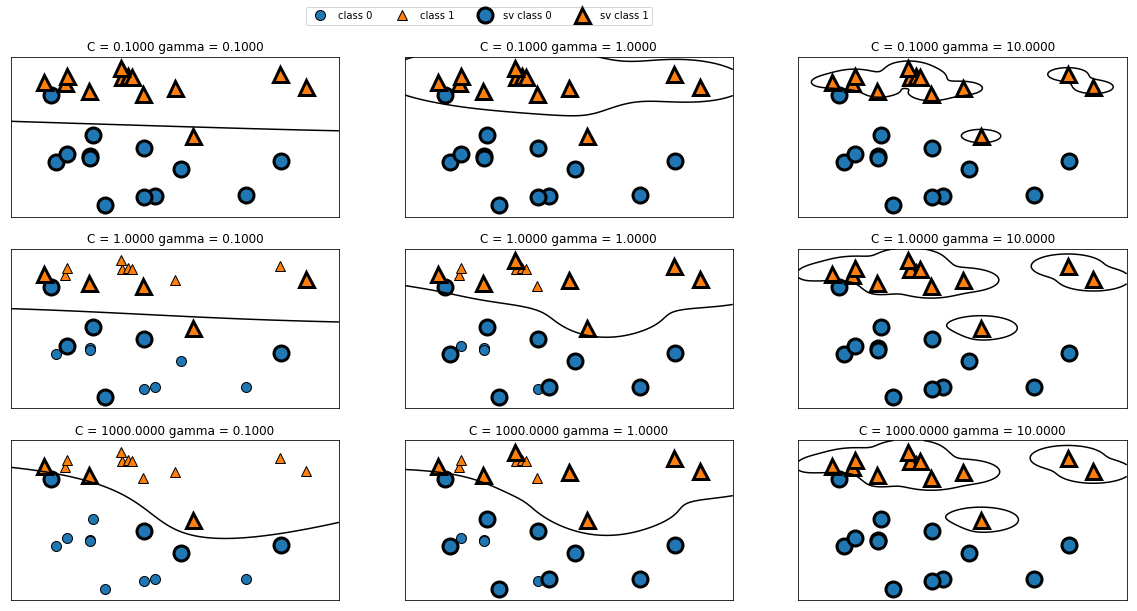